# Liner Regression Assignment 


### Problem Statement - As given
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal - As given

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data & Understanding the structure of the data



In [2]:
cars_info = pd.read_csv("C:\\Users\\Admin\\Desktop\\CarPrice_Assignment.csv")
cars_info.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
cars_info.shape

(205, 26)

In [5]:
cars_info.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Cleaning and Preparing the data for analysis
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building. 

In [6]:
CompanyName = cars_info['CarName'].apply(lambda x : x.split(' ')[0])
cars_info.insert(3,"CompanyName",CompanyName)
cars_info.drop(['CarName'],axis=1,inplace=True)
cars_info.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#Plotting a heatmap for a variables in our DF

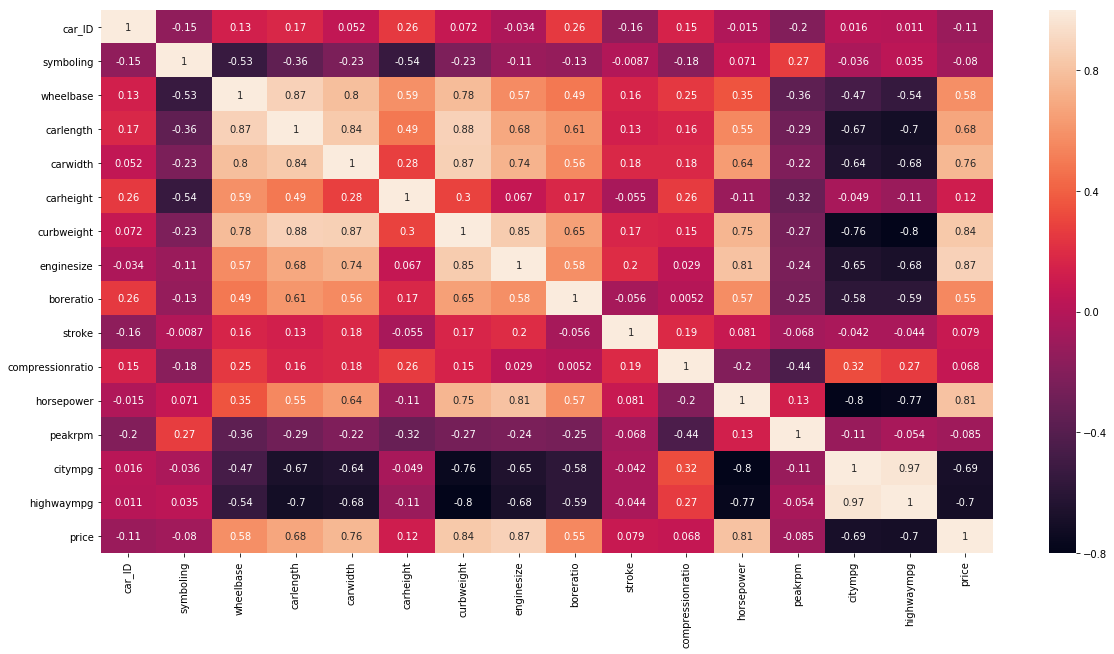

In [8]:
plt.figure(figsize = (20,10))  
sns.heatmap(cars_info.corr(),annot = True)

From above heat it is noted that there is a high corelation between:
carlength, curbweight, wheelbase and carwidth

### Now, as we can see there are company names with incorrect values - such as wrong spellings, mulitple names for a single company etc. Let's fix this.

In [9]:
cars_info.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- Following companies have wrong names: 
 Mazda, Nissan, Porsche, toyota & volkswagen

   

In [10]:
# As we have some redundant data in carName lets fix it 
cars_info.CompanyName = cars_info['CompanyName'].str.lower()
cars_info['CompanyName'] = cars_info['CompanyName'].str.replace('vw','volkswagen')
cars_info['CompanyName'] = cars_info['CompanyName'].str.replace('vokswagen','volkswagen')
cars_info['CompanyName'] = cars_info['CompanyName'].str.replace('toyouta','toyota')
cars_info['CompanyName'] = cars_info['CompanyName'].str.replace('porcshce','porsche')
cars_info['CompanyName'] = cars_info['CompanyName'].str.replace('maxda','mazda')
cars_info['CompanyName'] = cars_info['CompanyName'].str.replace('maxda','mazda')

cars_info.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
cars_info.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

###  Visualizing the data


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


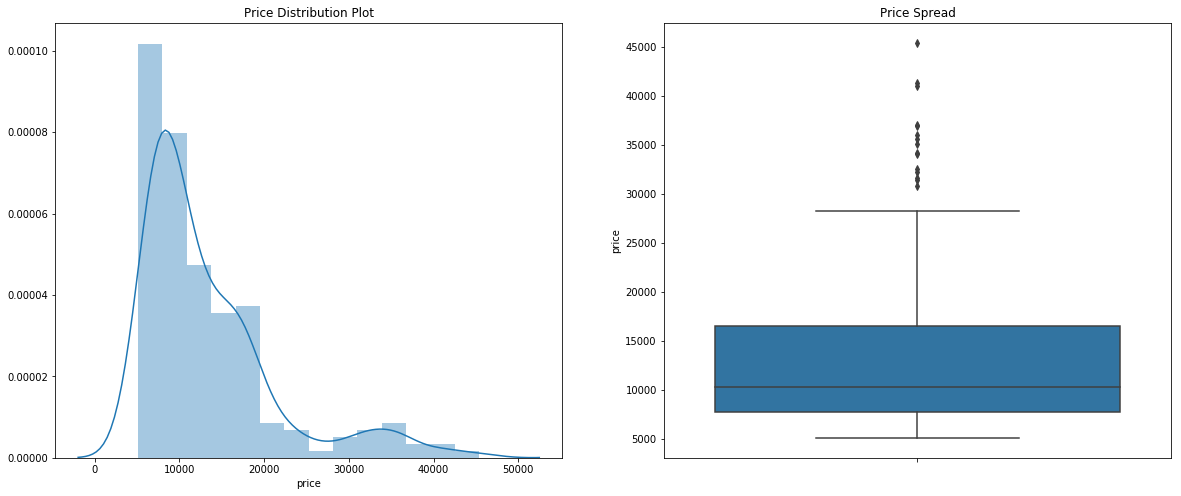

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(cars_info.price)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=cars_info.price)

plt.show()

#### Outcome read :

1. The plot is right-skewed which means that the most prices that are present are low and > 15000
2. It is also noted that data points are spread out far from the mean - Indicating high variance in car prices.
3. It is seen that there is a significant difference between the mean and the median of the price distribution.

#### Visualising Categorical Data : Some of the categorical variables are:

    1. CompanyName
    2. Symboling
    3. fueltype
    4. enginetype
    5. carbody
    6. doornumber
    7. enginelocation
    8. fuelsystem
    9. cylindernumber
    10. aspiration
    11. drivewheel

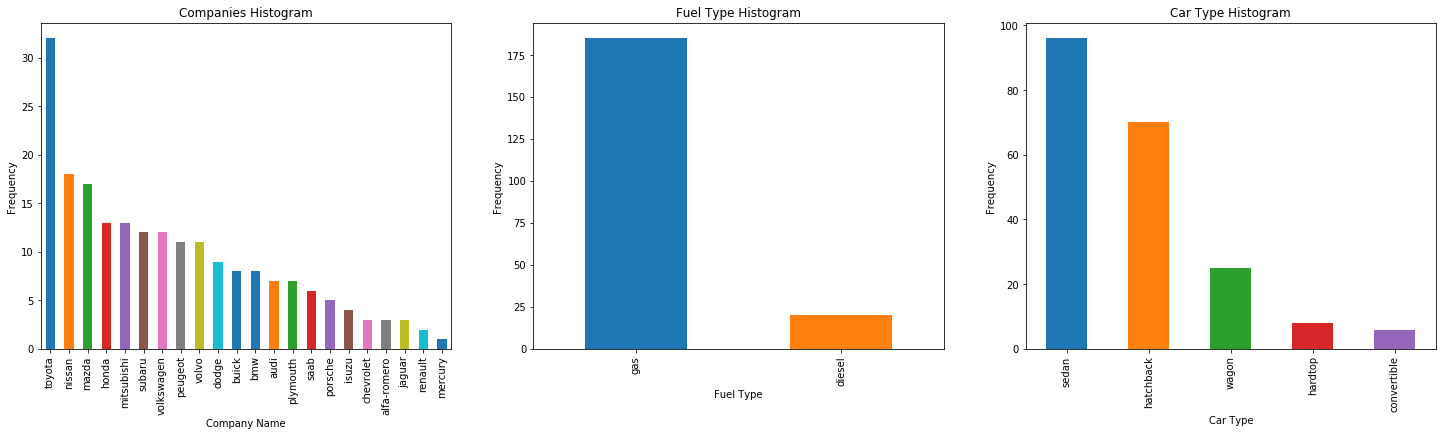

In [13]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars_info.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Company Name', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = cars_info.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency')

plt.subplot(1,3,3)
plt1 = cars_info.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency')

plt.show()

#### Outcome noted :

1. `Toyota` has the highest frequency compared to other makes
2. `Gas` type is preffered over `disiel`
3. `sedan` is the top car type preffered.

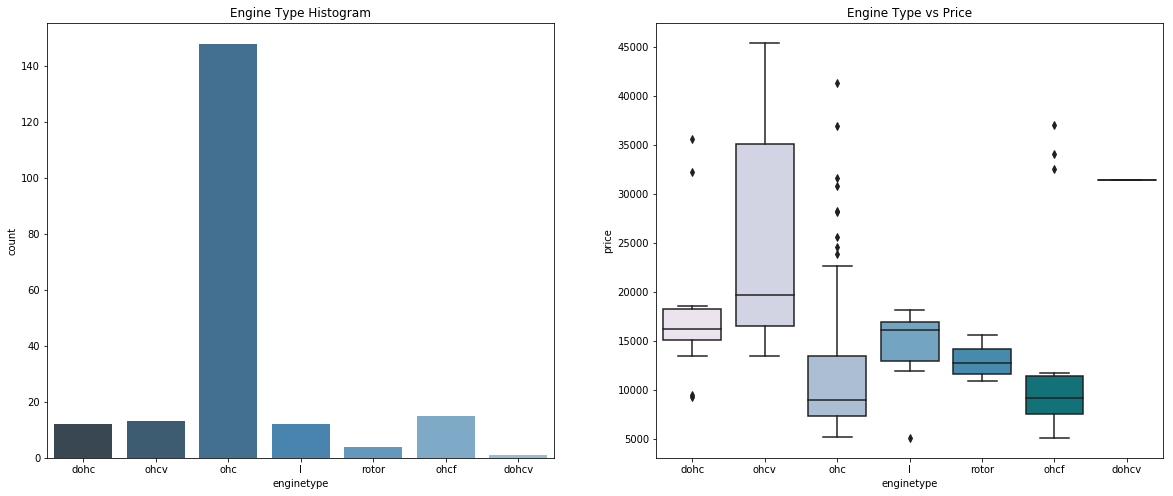

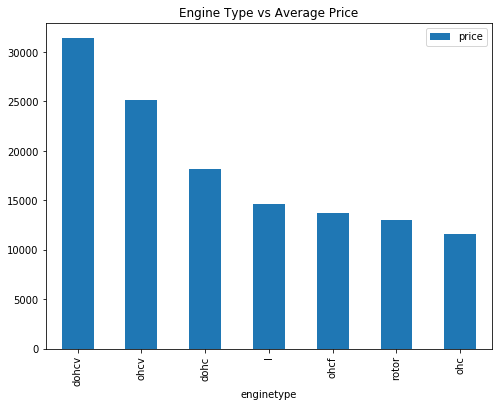

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars_info.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars_info.enginetype, y=cars_info.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars_info.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

#### Outcome noted :

1. `ohc` Engine type is the the highest
2. `ohcv` has the highest price range amongst others

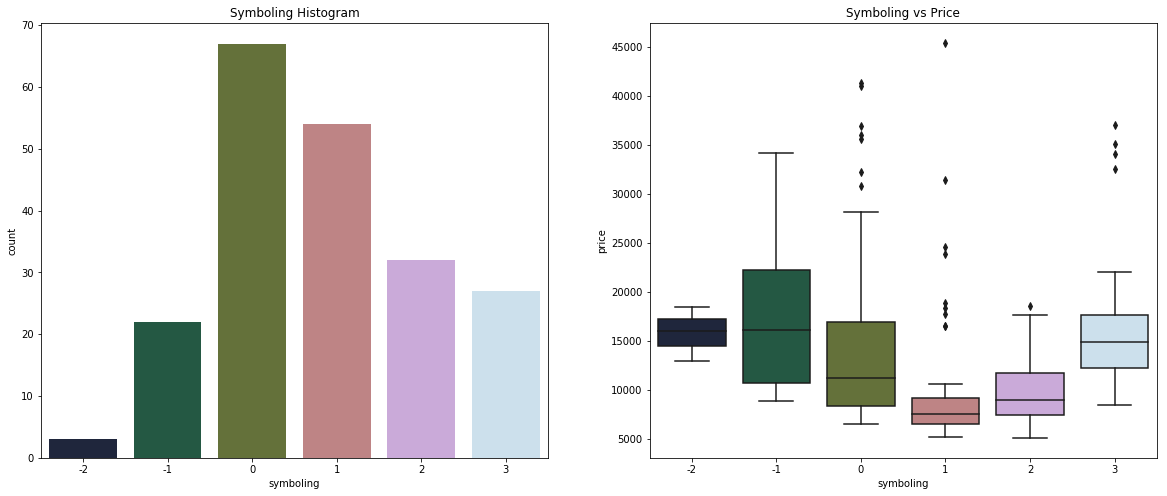

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars_info.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars_info.symboling, y=cars_info.price, palette=("cubehelix"))

plt.show()

#### Outcome noted :

1. It seems that the symboling with `0` and `1` values have highest frequency
2. The cars with `-1` symboling are on the higher pricing side

<Figure size 1800x432 with 0 Axes>

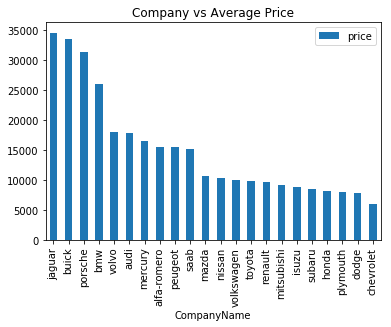

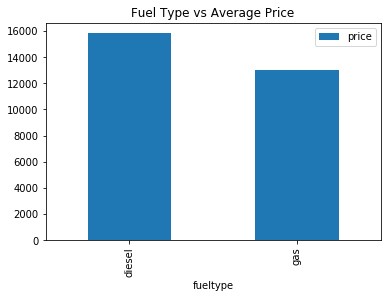

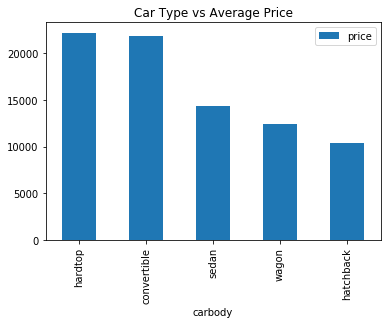

In [16]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars_info.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company vs Average Price')
plt.show()

df = pd.DataFrame(cars_info.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars_info.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Outcome noted :

1. `Jaguar` and `Buick` have  the highest average price.
2.  Price of `diesel` makes are higher than `gas`
3. `hardtop` and `convertible` have higher average price.

# Dealing with Categorical Fields 

In [17]:
# Converting Yes to 1 and No to 0
cars_info['fueltype'] = cars_info['fueltype'].map({'gas': 1, 'diesel': 0})
cars_info['aspiration'] = cars_info['aspiration'].map({'std': 1, 'turbo': 0})
cars_info['doornumber'] = cars_info['doornumber'].map({'two': 1, 'four': 0})
cars_info['enginelocation'] = cars_info['enginelocation'].map({'front': 1, 'rear': 0})

##### The Above step converts categorical fields into binary val

In [18]:
cars_info.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,0,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,0,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Deriving New metrics for modeling

In [19]:
#Fuel economy
cars_info['fueleconomy'] = (0.55 * cars_info['citympg']) + (0.45 * cars_info['highwaympg'])

In [20]:
#Binning the Car Companies based on avg prices of each Company.
cars_info['price'] = cars_info['price'].astype('int')
temp_cars = cars_info.copy()
table = temp_cars.groupby(['CompanyName'])['price'].mean()
temp_cars = temp_cars.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars_info['carsrange'] = pd.cut(temp_cars['price_y'],bins,right=False,labels=cars_bin)
cars_info.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,1,1,0,sedan,fwd,1,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,1,1,0,sedan,4wd,1,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


<Figure size 1800x432 with 0 Axes>

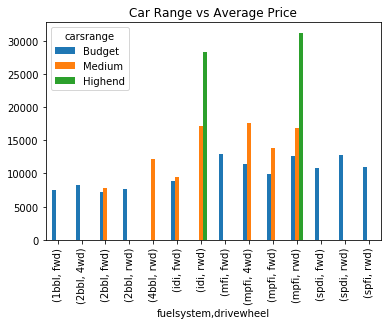

In [21]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars_info.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

###### OUTCOME noted: High-end cars have MPFI and FWD


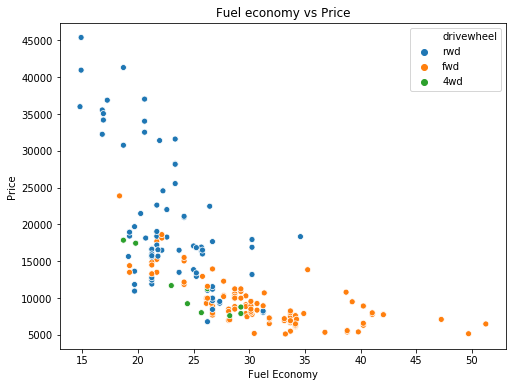

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars_info['fueleconomy'],y=cars_info['price'],hue=cars_info['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

Its noted that there is a negative correlation between fuel economy and price

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [23]:
cars_new = cars_info[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_new.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,1,1,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,1,1,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,1,1,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,1,1,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,1,1,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


# Creating Dummy Variables for categorical variables with more than 2 levels

In [24]:
df = pd.get_dummies(cars_new)
df.head()

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Budget,carsrange_Medium,carsrange_Highend
0,13495,1,1,88.6,2548,130,3.47,111,23.70,168.8,...,0,0,1,0,0,0,0,0,1,0
1,16500,1,1,88.6,2548,130,3.47,111,23.70,168.8,...,0,0,1,0,0,0,0,0,1,0
2,16500,1,1,94.5,2823,152,2.68,154,22.15,171.2,...,0,0,0,1,0,0,0,0,1,0
3,13950,1,1,99.8,2337,109,3.19,102,26.70,176.6,...,0,0,1,0,0,0,0,0,1,0
4,17450,1,1,99.4,2824,136,3.19,115,19.80,176.6,...,0,1,0,0,0,0,0,0,1,0


In [25]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_new DF

cars_new = dummies('fueltype',cars_new)
cars_new = dummies('aspiration',cars_new)
cars_new = dummies('carbody',cars_new)
cars_new = dummies('drivewheel',cars_new)
cars_new = dummies('enginetype',cars_new)
cars_new = dummies('cylindernumber',cars_new)
cars_new = dummies('carsrange',cars_new)

In [26]:
cars_new.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,1,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


## Splitting Data into Training and Testing Sets

In [27]:
cars_new.columns

Index([      'price',   'wheelbase',  'curbweight',  'enginesize',
         'boreratio',  'horsepower', 'fueleconomy',   'carlength',
          'carwidth',             1,             1,     'hardtop',
         'hatchback',       'sedan',       'wagon',         'fwd',
               'rwd',       'dohcv',           'l',         'ohc',
              'ohcf',        'ohcv',       'rotor',        'five',
              'four',         'six',       'three',      'twelve',
               'two',      'Medium',     'Highend'],
      dtype='object')

In [74]:
cars_new.shape

(205, 16)

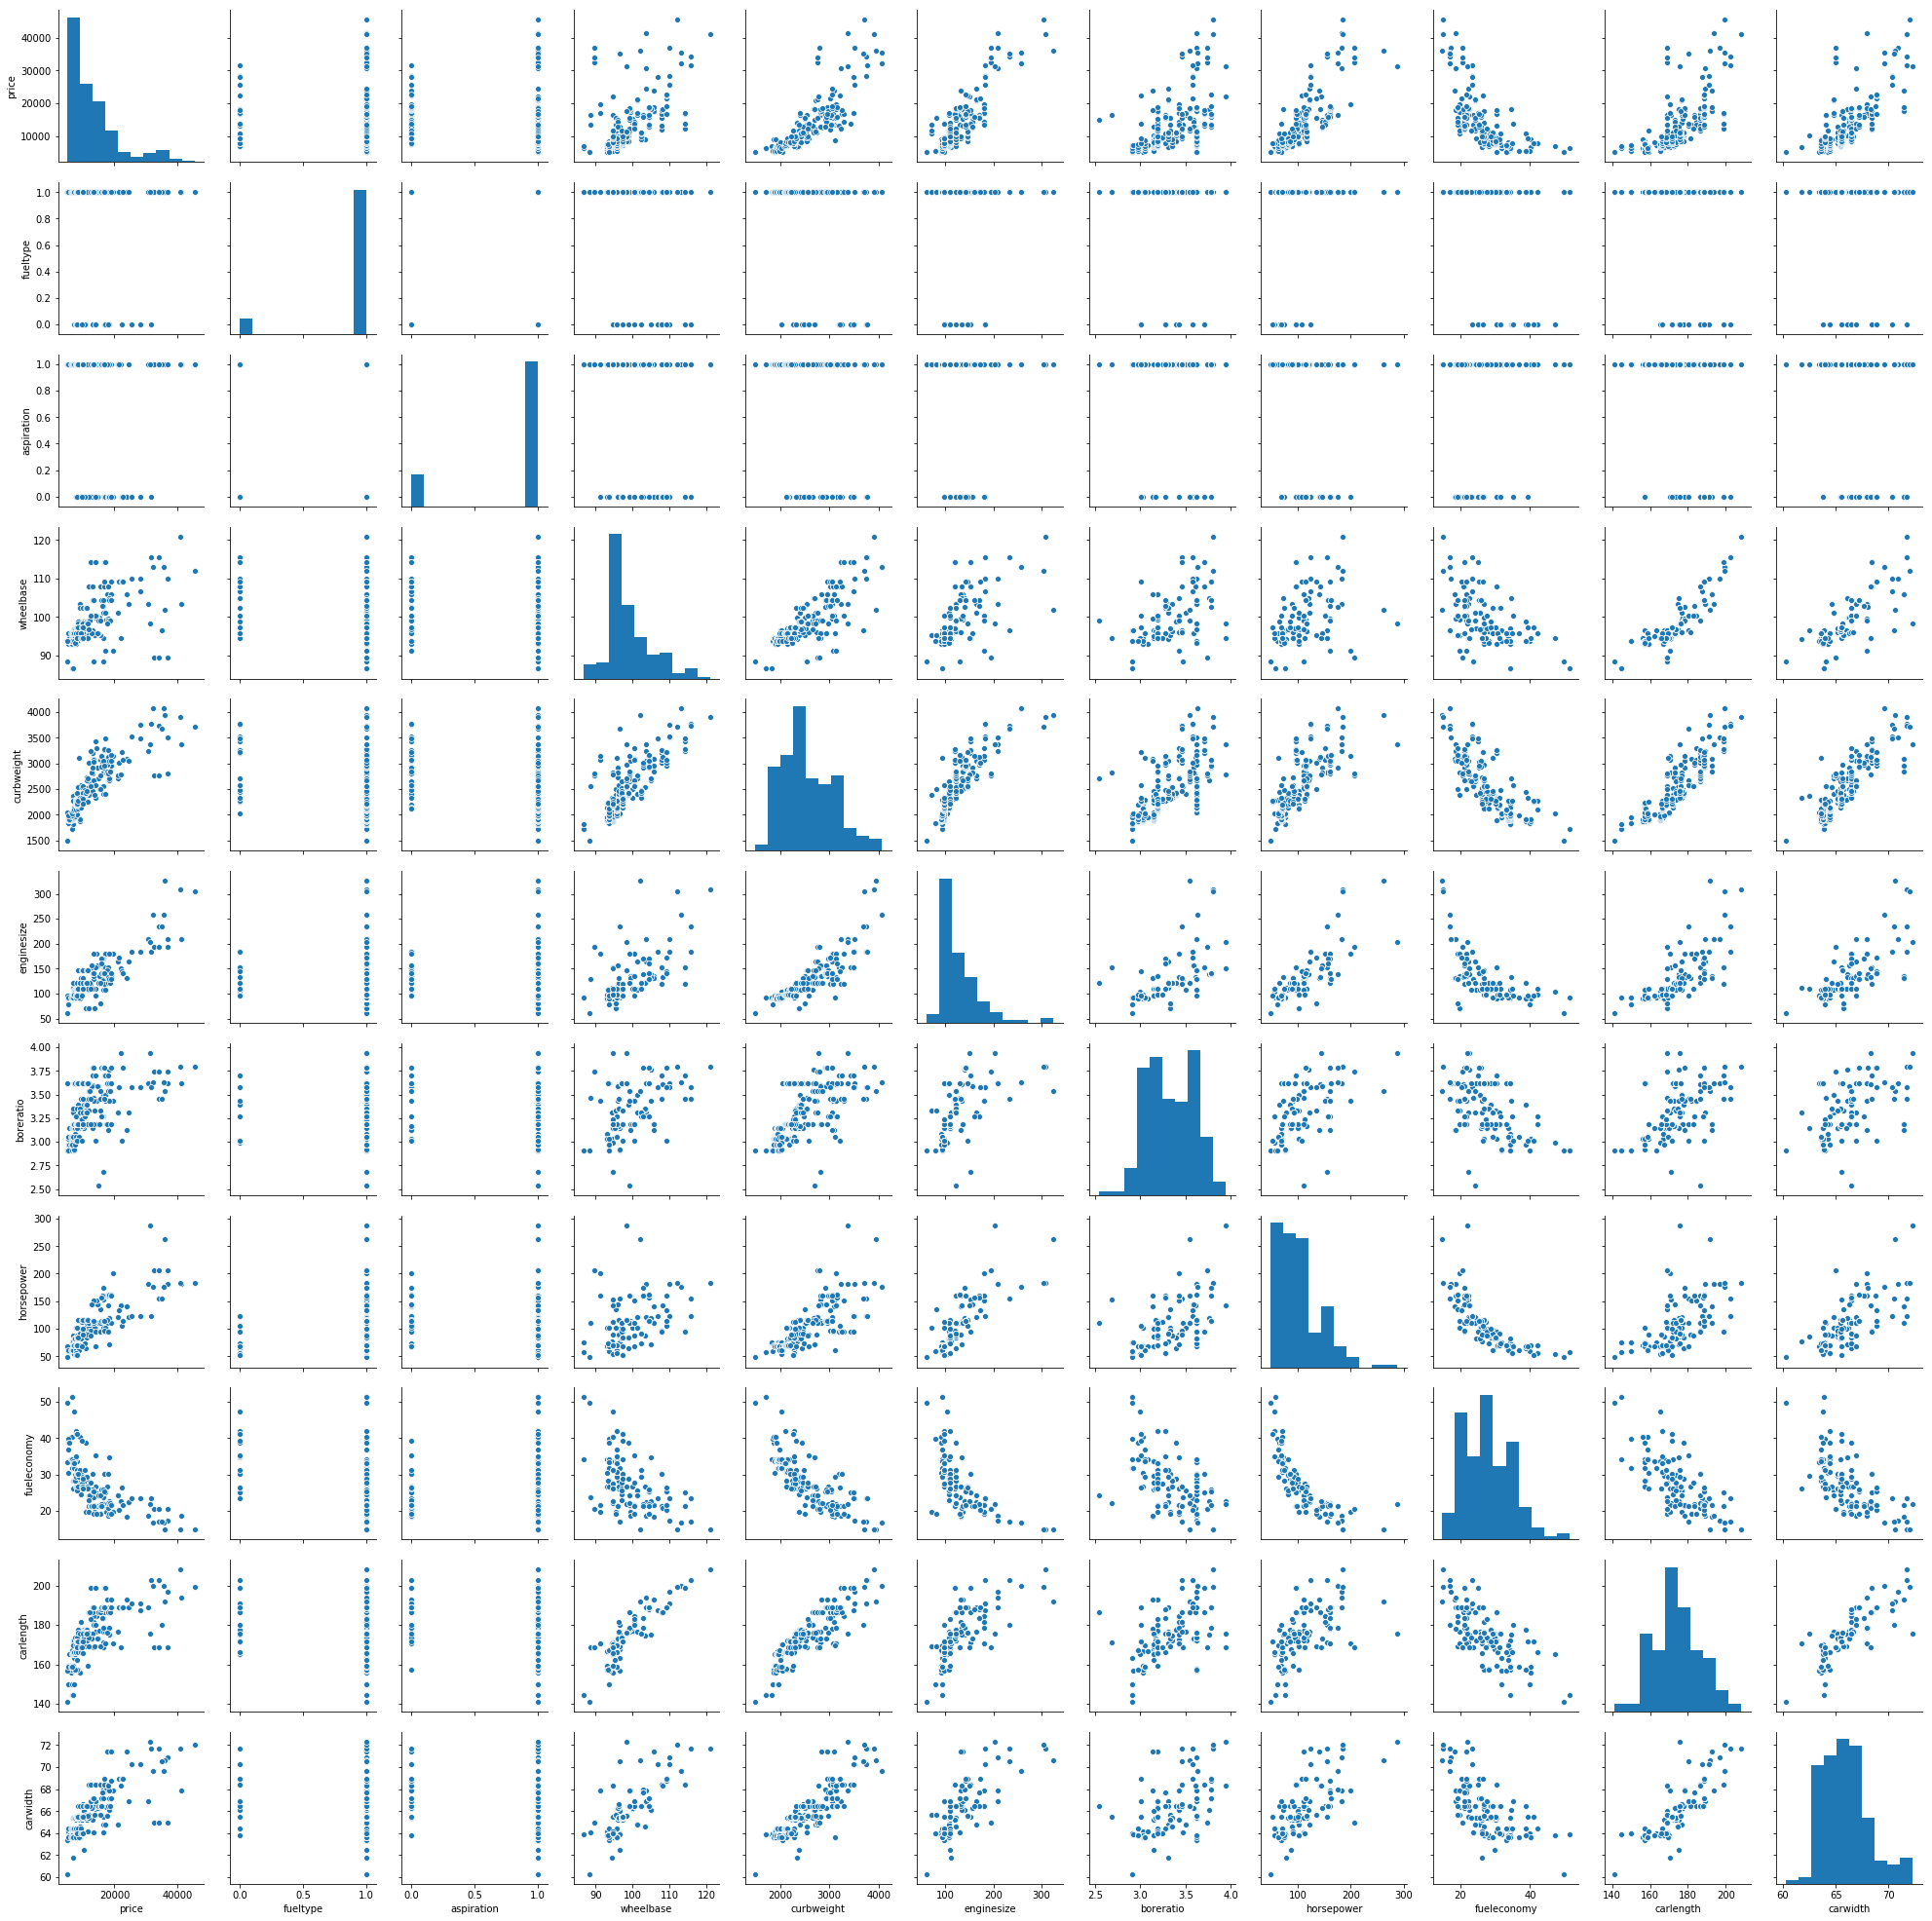

In [75]:
sns.pairplot(cars_new)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,1,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [32]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

# BUILDING MODELS - RFE

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True False False  True  True False  True False False  True  True
  True  True False False  True False False False False False  True  True
  True False  True False False  True]
[ 1  1  8  5  1  1  6  1 12 13  1  1  1  1 11 10  1 14  2  3  4 16  1  1
  1  9  1 15  7  1]


In [35]:
cars_new = cars_info[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_new.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,1,1,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,1,1,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,1,1,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,1,1,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,1,1,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [36]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four',
       'six', 'twelve', 'Highend'],
      dtype='object')

In [37]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 (1, False, 17),
 (1, False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

#### Building model using statsmodel, for the detailed statistics

In [39]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [40]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def Vif_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [41]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.29e-70
Time:                        22:50:39   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p-vale of `twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [42]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

### MODEL 2

In [43]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.25e-71
Time:                        22:50:40   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [44]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

### Model 3

In [45]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.85e-72
Time:                        22:50:40   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [46]:
#Calculating the Variance Inflation Factor
Vif_check(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


#### It can be noted that curbweight has th highest VIF hence dropping curbweight

In [47]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [48]:
Vif_check(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


### MODEL 4

In [49]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.70e-70
Time:                        22:50:42   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [50]:
Vif_check(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


##### drop sedan as it has a high vif value

In [51]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### MODEL 5

In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.68e-69
Time:                        22:50:43   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

Dropping wagon because of its high vfi val

In [53]:
Vif_check(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


In [54]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### MODEL 6

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.57e-70
Time:                        22:50:43   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [56]:
#Calculating the Variance Inflation Factor
Vif_check(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


Dropping dohcv to see the changes in model statistics

In [57]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)


### MODEL 7


In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.04e-67
Time:                        22:50:44   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [59]:
Vif_check(X_train_new)

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


# Residual Analysis of Model

In [60]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

#### Plot the histogram of the error terms


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

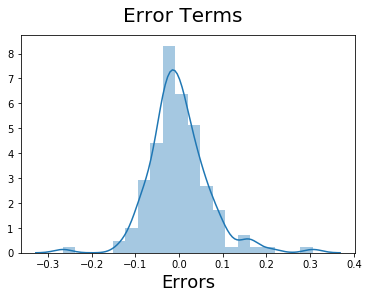

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms can be seen to be approximately be normally distributed, hence we can say that the assumption on the linear modeling is fulfilled.

# PREDECTION AND EVALUATION OF THE MODEL

In [62]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### #Dividing into X and y


In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#### MODEL 7

In [65]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'Car Price')

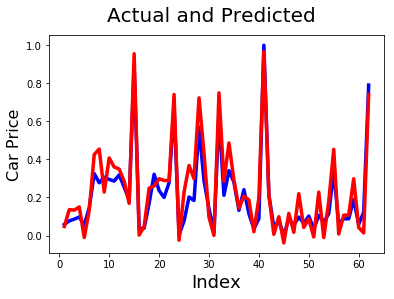

In [66]:
#Plotting Actual vs Predicted values
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

#### Evaluation of test via comparison of y_pred and y_test

In [67]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022037

Text(0, 0.5, 'y_pred')

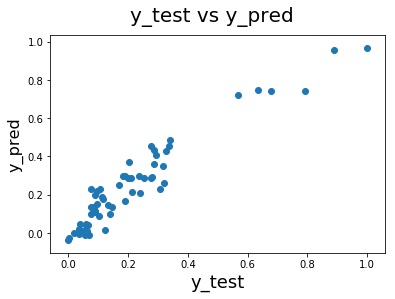

In [68]:
#EVALUATION OF THE MODEL
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0, 0.5, 'ytest-ypred')

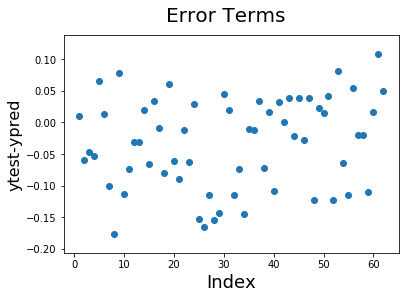

In [69]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Index')

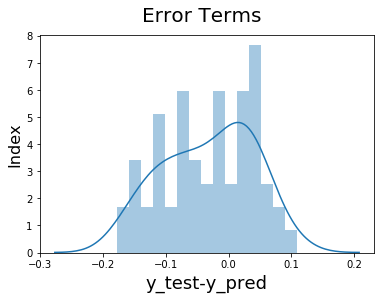

In [70]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)             

#### Evaluation of the model using Statistics

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.04e-67
Time:                        22:50:50   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [72]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.07786759394161434


#### Results seen :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.